Grafos direcionais e ponderados
===============================

**Autor:** Daniel R. Cassar



## Grafos direcionais



### Definição



Os grafos que vimos até o momento são os chamados **grafos não-direcionais**. Em um grafo não-direcional, se temos uma aresta entre os vértices $A$ e $B$, então podemos tanto navegar de $A$ para $B$ quanto de $B$ para $A$.

Em um **grafo direcional**, podemos apenas navegar na direção que cada aresta nos permite, e isso é indicado por uma seta. Por conta disso, as arestas em grafos direcionais também podem ser chamadas de **setas**. Uma seta &ldquo;sai&rdquo; de um vértice e &ldquo;chega&rdquo; em outro vértice. Se uma seta sai do vértice $J$ e chega no vértice $P$, então dizemos que $J$ é a **cauda** e que $P$ é a **cabeça** da seta.

Quando uma seta liga $J$ e $P$ em apenas uma direção (por exemplo, apenas permite sair de $J$ e chegar em $P$), então esta é uma **seta unidirecional**. Existem também **setas bidirecionais** onde é possível navegar entre os vértices da seta em qualquer direção (permite tanto &ldquo;ida&rdquo; quanto &ldquo;volta&rdquo;).

**Observação 1**: um grafo direcional onde *todas* as setas são bidirecionais se comporta de forma semelhante a um grafo não-direcional.

**Observação 2**: basta ter pelo menos uma seta direcional para um grafo ser chamado direcional.

O sistema de transporte de uma cidade é um grafo direcional pois nem toda rua é mão dupla e nem toda linha de transporte público vai e volta pelo mesmo caminho.

Quando um GPS busca um caminho entre o ponto $A$ e o ponto $B$ em uma cidade, ele resolve um problema de navegação em um grafo direcional caso seu método de transporte seja um veículo, ou resolve um problema de navegação em um grafo não-direcional caso seu método de transporte seja caminhada (isso pois não existe uma direção proibida quando caminhamos).



### Estrutura de dados e visualização



Grafos direcionais nos dão mais controle na construção de relações entre os objetos que eles contém. Podemos, por exemplo, modelar uma teia alimentar usando grafos direcionais! Neste caso, a direção das setas indica quem é alimento de quem. Para escrever um grafo direcional em Python, use um dicionário onde as chaves são as caudas e os valores são listas/conjuntos contendo as cabeças de cada cauda.



In [3]:
teia_alimentar = {
    "puma": ["passarinho", "esquilo"],
    "esquilo": ["planta"],
    "cobra": ["esquilo"],
    "passarinho": ["gafanhoto"],
    "falcão": ["passarinho", "sapo"],
    "gafanhoto": ["planta"],
    "sapo": ["gafanhoto", "lagarta"],
    "coruja": ["sapo", "esquilo"],
    "lagarta": ["planta"],
}

Para representar visualmente um grafo direcional, use a classe `DiGraph` do módulo `networkx`. Observe que antes estávamos usando o `Graph`, mas como este grafo é direcional usamos o `DiGraph` (*directional graph*).



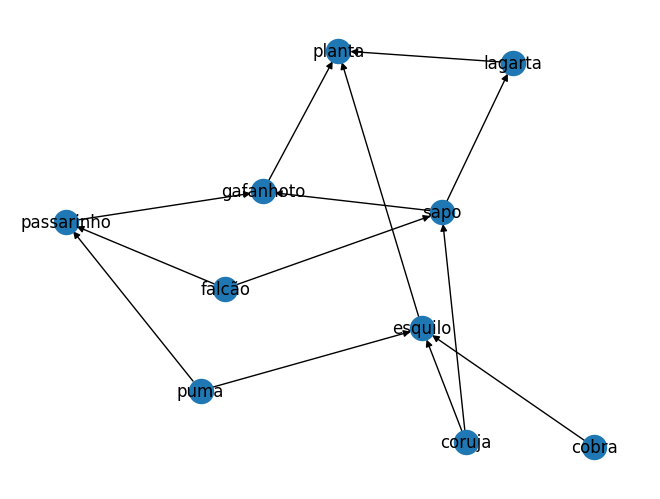

In [4]:
from networkx import DiGraph, draw

g = DiGraph(teia_alimentar)
draw(g, with_labels=True)

### Exercício



**Problema**: encontrar todos os vértices de um grafo.

**Entrada**: um grafo representado por um dicionário.

**Saída**: lista contendo todas os vértices do grafo de entrada.

**Considerações**: para resolver este problema, considere que existe a possibilidade de haverem vértices nos valores que não estão representados nas chaves do dicionário (isto é, o grafo é direcional).

**Algoritmo**:



In [30]:
def lista_vertices(grafo):
    """Encontra todos os vértices de um grafo."""

    vertices = []
    for chave in grafo:
        vertices.append(chave)
        for valor in grafo[chave]:
            vertices.append(valor)

    vertices = list(set(vertices))

    return vertices

**Teste**:



In [7]:
print("Os vértices da teia alimentar são:", lista_vertices(teia_alimentar))

Os vértices da teia alimentar são: ['cobra', 'falcão', 'esquilo', 'gafanhoto', 'puma', 'lagarta', 'coruja', 'planta', 'passarinho', 'sapo']


## Grafos ponderados



Em um **grafo ponderado**, nós atribuímos pesos ou rótulos aos vértices. Vamos ver um exemplo de um grafo contendo o custo de passagens de ônibus entre algumas cidades. Observe na estrutura de dados abaixo que usamos um dicionário com a chave `custo` para indicar o peso de cada aresta. Esta estrutura nos permite registrar mais de um atributo para cada aresta! Poderíamos, por exemplo, ter a informação de custo e a informação de distância no mesmo objeto.



In [10]:
rotas = {
    "Campinas": {
        "Sorocaba": {"custo": 38},
        "São Carlos": {"custo": 52},
        "Curitiba": {"custo": 150},
        "Poços de Caldas": {"custo": 60},
    },
    "Sorocaba": {
        "Campinas": {"custo": 38},
        "Poços de Caldas": {"custo": 100},
    },
    "São Carlos": {
        "Campinas": {"custo": 52},
    },
    "Curitiba": {
        "Campinas": {"custo": 150},
    },
    "Poços de Caldas": {
        "Campinas": {"custo": 60},
        "Sorocaba": {"custo": 100},
    },
}

Observe que este grafo ponderado não é direcional! Toda linha de ônibus neste caso faz o caminho de ida e de volta. Por isso, usamos novamente o `Graph` e não o `DiGraph`.

Para representar este grafo de maneira visual precisamos de alguns passos a mais do que estamos acostumados. Um detalhe é que temos que saber a posição de cada vértice para podermos mostrar os pesos nos locais corretos. Veja o código abaixo.



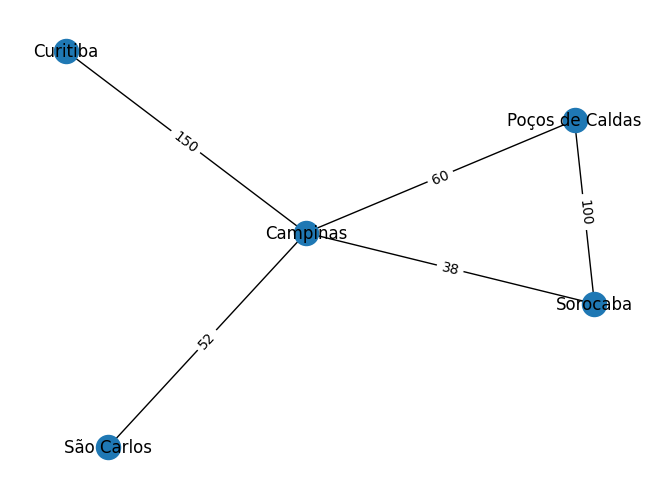

In [14]:
import networkx as nx

SEMENTE_ALEATORIA = 42
NOME_ROTULO = "custo"

g = nx.Graph(rotas)

posicao = nx.spring_layout(g, seed=SEMENTE_ALEATORIA)
draw(g, with_labels=True, pos=posicao)

# é aqui que nós plotamos os pesos das arestas
pesos = nx.get_edge_attributes(g, NOME_ROTULO)
nx.draw_networkx_edge_labels(g, posicao, edge_labels=pesos);

O significado dos pesos irá depender do que estamos modelando com os grafos. No exemplo anterior, os pesos nos mostram o custo de cada trajeto. Em um grafo que representa um passeio em uma cidade, os pesos podem nos indicar o tempo gasto entre sair de um lugar e chegar em outro. Em um grafo de uma molécula química, os pesos podem indicar a energia de ligação.

Podemos ter rótulos ao invés de pesos! Tente trocar os valores numéricos do grafo ponderado acima por strings para checar.

**Mini exercício**: como que eu recupero a informação do custo partindo de São Carlos para Campinas?



In [11]:
rotas["São Carlos"]["Campinas"]["custo"]

52

## Grafos ponderados direcionais



Nada nos impede de criarmos um **grafo ponderado e direcional** ao mesmo tempo! Podemos fazer isso usando novamente um dicionário como estrutura de dados. Veja o grafo modelando o ciclo da água abaixo. Neste caso, o peso de cada aresta está indicando a porcentagem de água que sai de cada cauda e chega em cada cabeça das setas.

**Observação**: Em grafos ponderados direcionais nós vamos usar a palavra `label` para indicar os pesos de cada aresta. Isso nos ajudará no futuro. A palavra `label` vem do inglês e significa rótulo ou etiqueta.



In [12]:
ciclo_da_agua = {
    "Atmosfera": {
        "Solo": {"label": 29.9},
        "Oceano": {"label": 70},
        "Espaço": {"label": 0.1},
    },
    "Solo": {
        "Plantas": {"label": 80},
        "Oceano": {"label": 20},
    },
    "Oceano": {
        "Atmosfera": {"label": 100},
    },
    "Plantas": {
        "Atmosfera": {"label": 100}
    },
}

Se tentarmos plotar o grafo acima usando o módulo `networkx` vamos ter um problema&#x2026; ele não nos permite indicar conexões entre os mesmos vértices que tenham pesos diferentes&#x2026; infelizmente, esta é uma limitação deste módulo. Vamos plotar mesmo assim para ver que esse é o caso.



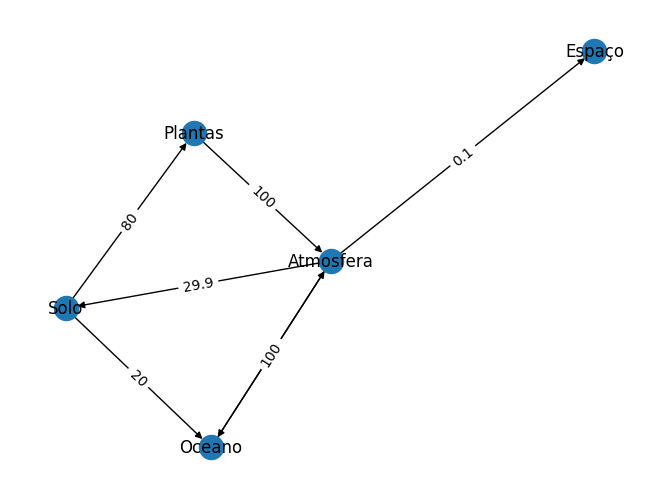

In [15]:
SEMENTE_ALEATORIA = 42
NOME_ROTULO = "label"

g = nx.DiGraph(ciclo_da_agua)

posicao = nx.spring_layout(g, seed=SEMENTE_ALEATORIA)
nx.draw(g, with_labels=True, pos=posicao)

pesos = nx.get_edge_attributes(g, NOME_ROTULO)
nx.draw_networkx_edge_labels(g, posicao, edge_labels=pesos);

Observe que no grafo acima deveríamos ter duas arestas com pesos diferentes entre oceano e atmosfera, mas não é isso que observamos.

Para exibir esse grafo corretamente vamos usar outra estratégia! Essa estratégia abaixo só funciona corretamente caso os pesos do grafo tenham o nome `label`. Por isso que demos esse nome anteriormente.

Primeiramente vamos obter uma string que representa o grafo na linguagem do `graphviz`.



In [22]:
from networkx.drawing.nx_agraph import to_agraph

grafo_teia = to_agraph(g)

print(grafo_teia.to_string())

strict digraph "" {
	A -> B;
	B -> C;
	C -> D;
	D -> C;
	D -> E;
	D -> G;
	E -> A;
	F -> C;
}



Agora copie e cole esta string neste site: [https://dreampuf.github.io/GraphvizOnline/](https://dreampuf.github.io/GraphvizOnline/)

Com isso, você terá a representação correta do seu grafo ponderado direcional.

Se você tem o software `graphviz` instalado no seu sistema, você pode fazer esse processo todo aqui dentro do próprio notebook seguindo o código abaixo. Se ele der um erro é por que você não tem este software instalado (mas tudo bem, pode fazer no site acima que o resultado é o mesmo).



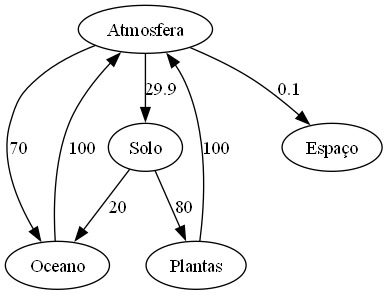

In [17]:
from IPython.display import Image, display

display(Image(grafo_teia.draw(format="png", prog="dot")))

No código acima, você pode alterar o argumento de `prog` para {&ldquo;neato&rdquo;, &ldquo;dot&rdquo;, &ldquo;twopi&rdquo;, &ldquo;circo&rdquo;, &ldquo;fdp&rdquo;, &ldquo;nop&rdquo;} e isso irá alterar a apresentação do seu grafo. Por exemplo:



In [ ]:
display(Image(grafo_teia.draw(format="png", prog="circo")))

Fora isso, você pode salvar seu grafo em uma imagem.



In [ ]:
grafo_teia.draw("meu_grafo.png", prog="dot")

## Navegando grafos direcionais não-ponderados



Desejamos resolver o seguinte problema

<hr>

**Problema**: encontrar a menor distância para chegar em cada vértice de um grafo direcional não-ponderado partindo de um vértice inicial.

**Entradas**: um grafo direcional não-ponderado representado por um dicionário e um vértice inicial.

**Saída**: dicionário relacionando os vértices com as distâncias em relação ao vértice inicial.

<hr>

O algoritmo de **busca em largura** também funciona para navegar grafos direcionais e computar as distâncias entre os vértices. Ele é capaz de resolver o problema proposto.

Como exemplo, vamos considerar o grafo abaixo.



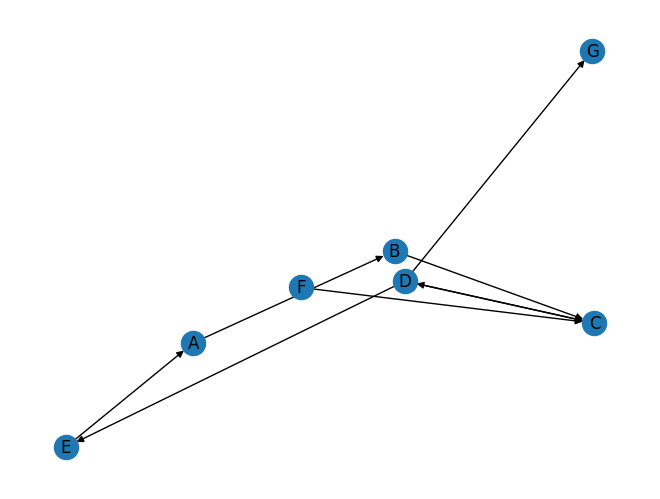

In [21]:
grafo = {
    "A": ["B"],
    "B": ["C"],
    "C": ["D"],
    "D": ["E", "G", "C"],
    "E": ["A"],
    "F": ["C"],
}

g = DiGraph(grafo)
draw(g, with_labels=True)

Usando a busca em largura, vamos calcular as distâncias para chegar nos vértices deste grafo partindo do vértice $A$.



In [29]:
def calcula_distancias(grafo, vertice_inicial):
    """Calcula as distâncias entre o vértice inicial e os demais vértices de um grafo"""

    if vertice_inicial not in grafo:
        return []
        
    distancia = {
        vertice_inicial: 0,
    }

    fila = [vertice_inicial]

    while len(fila) > 0:
        posicao_atual = fila.pop(0)
        distancia_ate_onde_estou = distancia[posicao_atual]
        distancia_vizinho = distancia_ate_onde_estou + 1

        for vizinho in grafo.get(posicao_atual, []):
            if vizinho not in distancia:
                fila.append(vizinho)
                distancia[vizinho] = distancia_vizinho
                
    return distancia

calcula_distancias(grafo, "A")
    

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2}

A propósito, o grafo deste exemplo tem um **ciclo** (também conhecido como **circuito**). Observe que conseguimos retornar ao vértice $A$ pelo seguinte caminho $A \rightarrow B \rightarrow C \rightarrow D \rightarrow E \rightarrow A$.

**Cuidado**: o algoritmo de busca em largura *não* funciona para grafos ponderados, sejam eles direcionais ou não! Para isso precisamos de outro algoritmo!



## Navegando grafos ponderados (direcionais ou não)



### O problema



Desejamos resolver o seguinte problema

<hr>

**Problema**: encontrar o menor custo para chegar em cada vértice de um grafo ponderado partindo de um vértice inicial.

**Entradas**: um grafo ponderado representado por um dicionário e um vértice inicial.

**Saída**: dicionário relacionando os vértices com os custos em relação ao vértice inicial.

<hr>

Vamos observar o grafo ponderado direcional abaixo. As distâncias entre os vértices estão representadas pelo rótulo `label`.



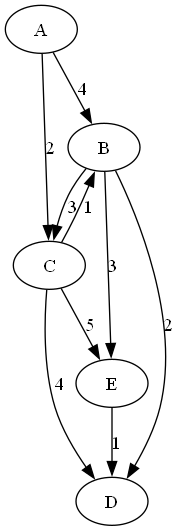

In [36]:
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image, display

grafo = {
    "A": {
        "B": {"label": 4},
        "C": {"label": 2},
    },
    "B": {
        "C": {"label": 3},
        "D": {"label": 2},
        "E": {"label": 3},
    },
    "C": {
        "B": {"label": 1},
        "D": {"label": 4},
        "E": {"label": 5},
    },
    "E": {
        "D": {"label": 1},
    },
}

g = DiGraph(grafo)
display(Image(to_agraph(g).draw(format="png", prog="dot")))

Não podemos usar a busca em largura em grafos ponderados para encontrar o menor caminho pois ela não leva em consideração os pesos dos vértices.



### A solução



Um algoritmo para encontrar o caminho de menor custo em um grafo ponderado é o algoritmo de Dijkstra [1] (pronuncia-se ​ˈdaɪkstrəz, &ldquo;dáikstrâ&rdquo;). &ldquo;Menor custo&rdquo; pode ter sentidos diferentes dependendo do contexto. Neste exemplo, o menor custo significa menor distância.

O algoritmo de Dijkstra é o seguinte:

<hr>

1.  Crie uma lista dos vértices não-visitados. Esta lista deve conter todos os vértices do grafo de entrada.

2.  Crie um dicionário para armazenar distâncias. Esse dicionário é inicializado com as chaves sendo os vértices do grafo de entrada e os valores sendo todos infinitos.

3.  Atualize o dicionário de distâncias da seguinte maneira: a distância para chegar ao vértice inicial é igual a zero.

4.  Remova o vértice inicial da lista dos vértices não-visitados.

5.  Atualize o dicionário de distâncias levando em consideração todos os vértices que podem ser visitados a partir do vértice inicial. Para isso, use os pesos dos vértices.

6.  Enquanto houverem itens na lista de vértices não-visitados:
    1.  Encontre o vértice que faz parte dos vértices não-visitados e que tem a menor distância no dicionário de distâncias. Chamaremos este vértice de posição atual. **Dica**: fazer uma função específica para resolver essa etapa.
    
    2.  Remova o vértice da posição atual da lista de vértices não-visitados.
    
    3.  Vamos chamar de `distancia_pos_atual` a distância para chegar na posição atual. Usando o valor de `distancia_pos_atual`, compute a distância para chegar em todos os vértices que podem ser visitados a partir do vértice atual. Sempre que observar uma distância *menor* do que a registrada no dicionário, atualize o valor no dicionário com essa nova distância.

7.  Retorne o dicionário de distâncias para o usuário.

<hr>

Veja uma forma de visualizar o algoritmo de Dijkstra no site [https://www.davbyjan.com/](https://www.davbyjan.com/).



### Implementação e teste



**Sugestão**: uma forma de facilitar a escrita de algoritmos é dividir algumas etapas em funções isoladas. Por exemplo, o passo `1` do algoritmo acima pode ser realizado pela função `lista_vertices` que foi criada neste notebook. Quem sabe o mesmo possa ser feito para o passo `A`?



In [45]:
def lista_vertices(grafo):
    """Encontra todos os vértices de um grafo."""

    vertices = []
    for chave in grafo:
        vertices.append(chave)
        for valor in grafo[chave]:
            vertices.append(valor)

    vertices = list(set(vertices))

    return vertices

def encontra_menor_distancia (distancias, nao_visitados):
    candidato = nao_visitados[0]
    dist_candidato = distancias[candidato]
    
    for vertice in nao_visitados:
        dist_vertices = distancias[vertice]
        
        if dist_vertices < dist_candidato:
            dist_candidato = dist_vertices
            candidato = vertice
            
    posicao_atual = candidato
    distancia_para_posicao_atual = dist_candidato
    
    return posicao_atual, distancia_para_posicao_atual

def dijkstra(grafo, vertice_inicial):
    """Computa o custo em um grafo ponderado usando o alg. de Dijkstra."""

    nao_visitados = lista_vertices(grafo)

    distancias = {}

    for vertice in nao_visitados:
        distancias[vertice] = float("inf")

    distancias[vertice_inicial] = 0
    nao_visitados.remove(vertice_inicial)

    for vizinho in grafo.get(vertice_inicial, []):
        distancias[vizinho] = grafo[vertice_inicial][vizinho]["label"]

    while len(nao_visitados) > 0:
        posicao_atual, distancia_pos_atual = encontra_menor_distancia(distancias, nao_visitados)
        nao_visitados.remove(posicao_atual)

        for vizinho in grafo.get(posicao_atual, []):
            distancia_vizinho = distancia_pos_atual + grafo[posicao_atual][vizinho]["label"]
            if distancia_vizinho < distancias[vizinho]:
                distancias[vizinho] = distancia_vizinho
                
    return distancias
        
    

Vamos testar o algoritmo.



In [46]:
vertice_inicial = "A"

dijkstra(grafo, vertice_inicial)

{'C': 2, 'D': 5, 'B': 3, 'E': 6, 'A': 0}

### Restrição



O algoritmo de Dijkstra *não* funciona caso seu grafo tenha um ou mais pesos negativos! Peso nulo não tem problema, porém pesos negativos fazem com que o algoritmo não funcione. Caso queira encontrar o caminho de menor custo em um grafo ponderado contendo pesos negativos, busque pelo **algoritmo de Bellman-Ford** [2].



## XKCD relevante



![img](https://imgs.xkcd.com/comics/edgelord.png)

`Imagem: Edgelord (XKCD) disponível em https://xkcd.com/2036`



## Referências



1.  Vídeo sobre o algoritmo de Dijkstra [https://www.youtube.com/watch?v=_lHSawdgXpI](https://www.youtube.com/watch?v=_lHSawdgXpI)

2.  Vídeo sobre o algoritmo de Bellman-Ford [https://www.youtube.com/watch?v=obWXjtg0L64](https://www.youtube.com/watch?v=obWXjtg0L64)

3.  Visualização do algoritmo de Dijkstra [https://www.davbyjan.com/](https://www.davbyjan.com/)

